01. Importing Data and Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/kevinclancy/Desktop/Master Folder'

In [3]:
# import data 
df_instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart.pkl'))

In [4]:
# check df_instacart output
df_instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order,first_order,product_id,add_to_cart_order,product_name,...,first_name,last_name,Gender,State,Age,date_joined,dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


02. Address PII

In [5]:
# drop columns first_name and last_name
df_instacart = df_instacart.drop(columns =['first_name', 'last_name'])

In [6]:
# check output 
df_instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order,first_order,product_id,add_to_cart_order,product_name,...,frequent_customer,frequency_flag,Gender,State,Age,date_joined,dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196.0,1.0,Soda,...,20.5,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196.0,1.0,Soda,...,20.5,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196.0,1.0,Soda,...,20.5,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196.0,1.0,Soda,...,20.5,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196.0,1.0,Soda,...,20.5,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both


03. Regional Segmentation

In [7]:
# create region list
result = []

for state in df_instacart["State"]:
    if state in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        result.append("Northeast")
    elif state in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append("Midwest")
    elif state in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append("South")
    else:
        result.append("West")

In [8]:
# create region column 
df_instacart['Region'] = result

In [9]:
pd.options.display.max_columns = None

In [10]:
df_instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order,first_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spend_flag,frequent_customer,frequency_flag,Gender,State,Age,date_joined,dependants,fam_status,income,_merge,Region
0,2539329,1,1,2,8,NaN,True,196.0,1.0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly Busy Days,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,False,196.0,1.0,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest Days,Fewest Orders,10,New customer,6.367797,Low Spender,20.5,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,False,196.0,1.0,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest Days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,False,196.0,1.0,Soda,77,7,9.0,Mid-range product,Least busy,Slowest Days,Fewest Orders,10,New customer,6.367797,Low Spender,20.5,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,False,196.0,1.0,Soda,77,7,9.0,Mid-range product,Least busy,Slowest Days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [11]:
# determine if there's a difference in spending habits between regions 
crosstab = pd.crosstab(df_instacart['spend_flag'], df_instacart['Region'], dropna = False)

In [12]:
crosstab.to_clipboard()

04. Exclusion Flag

In [13]:
# create low activity flag
df_instacart.loc[(df_instacart['max_order'] < 5), 'activity_flag'] = 'Low Activity'

In [14]:
# create regular activity flag
df_instacart.loc[(df_instacart['max_order'] >= 5), 'activity_flag'] = 'Regular Activity'

In [15]:
# check counts
df_instacart['activity_flag'].value_counts(dropna = False)

activity_flag
Regular Activity    30964564
Low Activity         1440295
Name: count, dtype: int64

In [16]:
# create exclusion dataframe
df_exclusion = df_instacart[df_instacart["activity_flag"].isin(["Regular Activity"])]

In [17]:
# check counts
df_exclusion['activity_flag'].value_counts(dropna = False)

activity_flag
Regular Activity    30964564
Name: count, dtype: int64

05. Customer Profiling

In [18]:
pd.options.display.float_format = '{:.2f}'.format

In [19]:
df_exclusion[['Age', 'income', 'department_id', 'dependants']].describe()

,Age,income,department_id,dependants
count,30964564.00,30964564.00,30964564.00,30964564.00
mean,49.47,99675.87,9.92,1.50
std,18.49,43141.87,6.28,1.12
min,18.00,25903.00,1.00,0.00
25%,33.00,67292.00,4.00,1.00
50%,49.00,96765.00,9.00,2.00
75%,65.00,128102.00,16.00,3.00
max,81.00,593901.00,21.00,3.00


In [20]:
# create income list
income = []

for value in df_exclusion["income"]:
    if value < 75000:
        income.append("Low Income")
    elif value in range(75000,150000):
        income.append("Medium Income")
    else:
        income.append("High Income")

In [21]:
# create new income bracket on df_exclusion
df_exclusion['income_bracket'] = income

/var/folders/v3/6fcll29s2gb15qgr6wfszqdc0000gn/T/ipykernel_88715/1230396724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusion['income_bracket'] = income


In [22]:
df_exclusion['income_bracket'].value_counts(dropna = False)

income_bracket
Medium Income    17162609
Low Income        9906680
High Income       3895275
Name: count, dtype: int64

In [23]:
# create parent list
result = []

for value in df_exclusion["dependants"]:
    if value == 0:
        result.append("Non Parent")
    else:
        result.append("Parent")

In [24]:
# create parental_status column
df_exclusion['parental_status'] = result

/var/folders/v3/6fcll29s2gb15qgr6wfszqdc0000gn/T/ipykernel_88715/2664355261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusion['parental_status'] = result


In [25]:
df_exclusion.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order,first_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spend_flag,frequent_customer,frequency_flag,Gender,State,Age,date_joined,dependants,fam_status,income,_merge,Region,activity_flag,income_bracket,parental_status
0,2539329,1,1,2,8,NaN,True,196.00,1.00,Soda,77,7,9.00,Mid-range product,Regularly busy,Regularly Busy Days,Average Orders,10,New customer,6.37,Low Spender,20.50,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Low Income,Parent
1,2398795,1,2,3,7,15.00,False,196.00,1.00,Soda,77,7,9.00,Mid-range product,Regularly busy,Slowest Days,Fewest Orders,10,New customer,6.37,Low Spender,20.50,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Low Income,Parent
2,473747,1,3,3,12,21.00,False,196.00,1.00,Soda,77,7,9.00,Mid-range product,Regularly busy,Slowest Days,Most Orders,10,New customer,6.37,Low Spender,20.50,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Low Income,Parent
3,2254736,1,4,4,7,29.00,False,196.00,1.00,Soda,77,7,9.00,Mid-range product,Least busy,Slowest Days,Fewest Orders,10,New customer,6.37,Low Spender,20.50,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Low Income,Parent
4,431534,1,5,4,15,28.00,False,196.00,1.00,Soda,77,7,9.00,Mid-range product,Least busy,Slowest Days,Most Orders,10,New customer,6.37,Low Spender,20.50,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Low Income,Parent


In [26]:
# create young adult flag
df_exclusion.loc[df_exclusion['Age'].between(18,39), 'age_group'] = 'Young Adult'

/var/folders/v3/6fcll29s2gb15qgr6wfszqdc0000gn/T/ipykernel_88715/4231869865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusion.loc[df_exclusion['Age'].between(18,39), 'age_group'] = 'Young Adult'


In [27]:
# create middle-aged adult flag
df_exclusion.loc[df_exclusion['Age'].between(40,64), 'age_group'] = 'Middle Aged Adult'

In [28]:
# create senior citizen flag
df_exclusion.loc[df_exclusion['Age'] >= 65, 'age_group'] = 'Senior Citizen'

In [29]:
df_exclusion['age_group'].value_counts(dropna = False)

age_group
Middle Aged Adult    12103910
Young Adult          10665110
Senior Citizen        8195544
Name: count, dtype: int64

In [30]:
# create single young adult flag
df_exclusion.loc[(df_exclusion['age_group'] == 'Young Adult')
                & (df_exclusion['parental_status'] == 'Non Parent'),
                'customer_profile'] = 'Single Young Adult'

/var/folders/v3/6fcll29s2gb15qgr6wfszqdc0000gn/T/ipykernel_88715/1063479397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusion.loc[(df_exclusion['age_group'] == 'Young Adult')


In [31]:
# create young adult parent flag
df_exclusion.loc[(df_exclusion['age_group'] == 'Young Adult')
                & (df_exclusion['parental_status'] == 'Parent'),
                'customer_profile'] = 'Young Adult Parent'

In [32]:
# create middle-aged single adult flag
df_exclusion.loc[(df_exclusion['age_group'] == 'Middle Aged Adult')
                & (df_exclusion['parental_status'] == 'Non Parent'),
                'customer_profile'] = 'Middle-Aged Single Adult'

In [33]:
# create middle-aged parent flag
df_exclusion.loc[(df_exclusion['age_group'] == 'Middle Aged Adult')
                & (df_exclusion['parental_status'] == 'Parent'),
                'customer_profile'] = 'Middle-Aged Parent'

In [34]:
# create single senior citizen flag
df_exclusion.loc[(df_exclusion['age_group'] == 'Senior Citizen')
                & (df_exclusion['parental_status'] == 'Non Parent'),
                'customer_profile'] = 'Single Senior Citizen'

In [35]:
# create senior citizen parent flag
df_exclusion.loc[(df_exclusion['age_group'] == 'Senior Citizen')
                & (df_exclusion['parental_status'] == 'Parent'),
                'customer_profile'] = 'Senior Citizen Parent'

In [36]:
df_exclusion['customer_profile'].value_counts()

customer_profile
Middle-Aged Parent          9046762
Young Adult Parent          8004535
Senior Citizen Parent       6173586
Middle-Aged Single Adult    3057148
Single Young Adult          2660575
Single Senior Citizen       2021958
Name: count, dtype: int64

In [37]:
# group customer_profile and income_bracket
df_exclusion.groupby('customer_profile')['income_bracket'].value_counts(dropna = False)

customer_profile          income_bracket
Middle-Aged Parent        Medium Income     5798251
                          High Income       1670490
                          Low Income        1578021
Middle-Aged Single Adult  Medium Income     1958410
                          High Income        578225
                          Low Income         520513
Senior Citizen Parent     Medium Income     4068824
                          High Income       1149333
                          Low Income         955429
Single Senior Citizen     Medium Income     1325938
                          High Income        395159
                          Low Income         300861
Single Young Adult        Low Income        1653234
                          Medium Income      983718
                          High Income         23623
Young Adult Parent        Low Income        4898622
                          Medium Income     3027468
                          High Income         78445
Name: count, dtype: int

In [38]:
# group department_id and age_group
df_exclusion.groupby('department_id')['customer_profile'].value_counts(dropna = False)

department_id  customer_profile        
1              Middle-Aged Parent          620619
               Young Adult Parent          548618
               Senior Citizen Parent       423146
               Middle-Aged Single Adult    210059
               Single Young Adult          178185
                                            ...  
21             Young Adult Parent           16731
               Senior Citizen Parent        12932
               Middle-Aged Single Adult      6184
               Single Young Adult            5768
               Single Senior Citizen         3983
Name: count, Length: 126, dtype: int64

06. Distribution of Profiles

In [39]:
# create horizontal bar chart of customer profile by income
df_exclusion.groupby(['customer_profile','income_bracket']).size().unstack()

income_bracket,High Income,Low Income,Medium Income
customer_profile,,,
Middle-Aged Parent,1670490,1578021,5798251
Middle-Aged Single Adult,578225,520513,1958410
Senior Citizen Parent,1149333,955429,4068824
Single Senior Citizen,395159,300861,1325938
Single Young Adult,23623,1653234,983718
Young Adult Parent,78445,4898622,3027468


<Figure size 100x0 with 0 Axes>

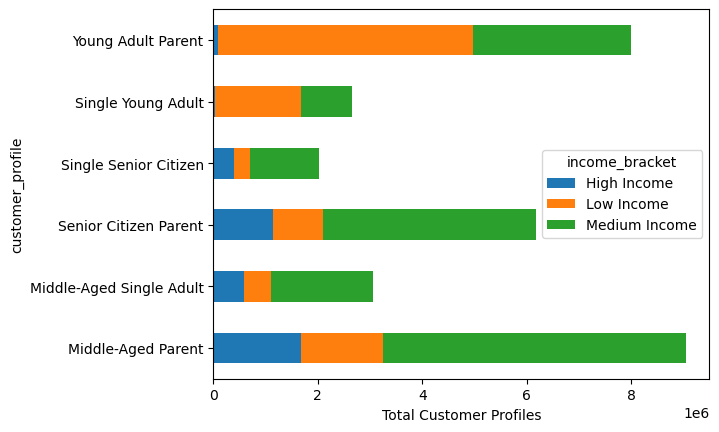

In [40]:
# plot horizontal bar chart
plt.figure(figsize = (1,0))
cust_prof = df_exclusion.groupby(['customer_profile','income_bracket']).size().unstack().plot.barh(stacked=True).set_xlabel('Total Customer Profiles')

In [41]:
# export customer_profile/income chart
cust_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cust_prof.png'))

In [42]:
# group region and customer profile columns
df_exclusion.groupby('Region')['customer_profile'].value_counts(dropna = False)

Region     customer_profile        
Midwest    Middle-Aged Parent          2137494
           Young Adult Parent          1867238
           Senior Citizen Parent       1433965
           Middle-Aged Single Adult     736972
           Single Young Adult           615763
           Single Senior Citizen        470081
Northeast  Middle-Aged Parent          1602659
           Young Adult Parent          1401576
           Senior Citizen Parent       1105968
           Middle-Aged Single Adult     505482
           Single Young Adult           470161
           Single Senior Citizen        378839
South      Middle-Aged Parent          2975837
           Young Adult Parent          2702645
           Senior Citizen Parent       2050724
           Middle-Aged Single Adult    1018594
           Single Young Adult           905602
           Single Senior Citizen        657737
West       Middle-Aged Parent          2330772
           Young Adult Parent          2033076
           Senior Citize

In [43]:
# make 2d for horizontal chart
df_exclusion.groupby(['Region','customer_profile']).size().unstack()

customer_profile,Middle-Aged Parent,Middle-Aged Single Adult,Senior Citizen Parent,Single Senior Citizen,Single Young Adult,Young Adult Parent
Region,,,,,,
Midwest,2137494,736972,1433965,470081,615763,1867238
Northeast,1602659,505482,1105968,378839,470161,1401576
South,2975837,1018594,2050724,657737,905602,2702645
West,2330772,796100,1582929,515301,669049,2033076


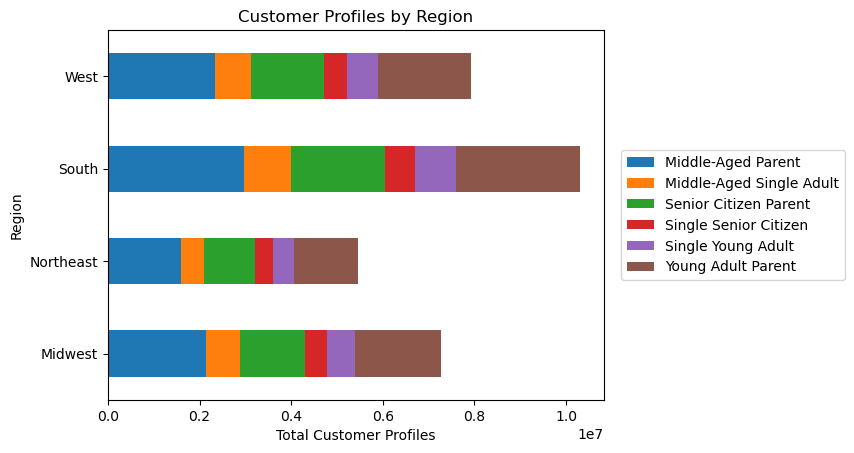

In [44]:
# create horizontal chart
region_bar = df_exclusion.groupby(['Region','customer_profile']).size().unstack().plot.barh(stacked = True).set_xlabel('Total Customer Profiles')
plt.title('Customer Profiles by Region')
plt.legend(loc = 'center right', bbox_to_anchor=(1.50,0.5))
plt.show()

In [45]:
# export customer profiles by region
region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_bar.png'))

07. Aggregate Customer Profiles

In [46]:
# aggregate customer_profile and last_order
df_exclusion.groupby('customer_profile').agg({'last_order': ['mean','min','max']})

last_order           
                               mean  min   max
customer_profile                              
Middle-Aged Parent            10.86 0.00 30.00
Middle-Aged Single Adult      10.72 0.00 30.00
Senior Citizen Parent         10.80 0.00 30.00
Single Senior Citizen         10.77 0.00 30.00
Single Young Adult            10.90 0.00 30.00
Young Adult Parent            10.78 0.00 30.00

In [47]:
df_exclusion.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order,first_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spend_flag,frequent_customer,frequency_flag,Gender,State,Age,date_joined,dependants,fam_status,income,_merge,Region,activity_flag,income_bracket,parental_status,age_group,customer_profile
0,2539329,1,1,2,8,NaN,True,196.00,1.00,Soda,77,7,9.00,Mid-range product,Regularly busy,Regularly Busy Days,Average Orders,10,New customer,6.37,Low Spender,20.50,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Low Income,Parent,Young Adult,Young Adult Parent
1,2398795,1,2,3,7,15.00,False,196.00,1.00,Soda,77,7,9.00,Mid-range product,Regularly busy,Slowest Days,Fewest Orders,10,New customer,6.37,Low Spender,20.50,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Low Income,Parent,Young Adult,Young Adult Parent
2,473747,1,3,3,12,21.00,False,196.00,1.00,Soda,77,7,9.00,Mid-range product,Regularly busy,Slowest Days,Most Orders,10,New customer,6.37,Low Spender,20.50,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Low Income,Parent,Young Adult,Young Adult Parent
3,2254736,1,4,4,7,29.00,False,196.00,1.00,Soda,77,7,9.00,Mid-range product,Least busy,Slowest Days,Fewest Orders,10,New customer,6.37,Low Spender,20.50,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Low Income,Parent,Young Adult,Young Adult Parent
4,431534,1,5,4,15,28.00,False,196.00,1.00,Soda,77,7,9.00,Mid-range product,Least busy,Slowest Days,Most Orders,10,New customer,6.37,Low Spender,20.50,Non Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Regular Activity,Low Income,Parent,Young Adult,Young Adult Parent


In [48]:
# create total spend column on df_exclusion
df_exclusion['total_spend'] = df_exclusion.groupby('user_id')['prices'].transform('sum')

/var/folders/v3/6fcll29s2gb15qgr6wfszqdc0000gn/T/ipykernel_88715/2712381425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclusion['total_spend'] = df_exclusion.groupby('user_id')['prices'].transform('sum')


In [49]:
df_exclusion.groupby('customer_profile')['total_spend'].value_counts()

customer_profile    total_spend
Middle-Aged Parent  12058.30       2973
                    21509.20       2888
                    10930.60       2765
                    18830.20       2735
                    20122.60       2724
                                   ... 
Young Adult Parent  25.40             5
                    15.00             5
                    12.50             5
                    11.50             5
                    36.90             5
Name: count, Length: 102732, dtype: int64

In [50]:
# aggregate loyalty_flag, total_spend, and last_order
df_exclusion.groupby('loyalty_flag').agg({'total_spend': ['mean','min','max'], 'last_order': ['mean', 'min', 'max']})

total_spend                   last_order           
                        mean    min        max       mean  min   max
loyalty_flag                                                        
Loyal customer       8089.33 156.00 2101976.90       6.03 0.00 30.00
New customer         1345.18   5.00  800423.20      17.60 0.00 30.00
Regular customer     3866.48  15.70 2104114.10      12.16 0.00 30.00

In [51]:
# aggregate customer_profile, total_spend, and last_order
df_exclusion.groupby('customer_profile').agg({'total_spend': ['mean','min','max'], 'last_order': ['mean', 'min', 'max']})

total_spend                  last_order           
                                mean   min        max       mean  min   max
customer_profile                                                           
Middle-Aged Parent           4865.30 10.40 1302986.80      10.86 0.00 30.00
Middle-Aged Single Adult     5066.55  5.00 1302311.80      10.72 0.00 30.00
Senior Citizen Parent        4907.53  6.80 1409778.90      10.80 0.00 30.00
Single Senior Citizen        4587.90 15.70  800423.20      10.77 0.00 30.00
Single Young Adult           4510.66 10.50 2101976.90      10.90 0.00 30.00
Young Adult Parent           4992.35  7.00 2104114.10      10.78 0.00 30.00

08. Region and Department comparison

In [52]:
# group and transform to 2d to create horizontal bar chart
loyal = df_exclusion.groupby(['loyalty_flag','department_id']).size().unstack()

Text(120.72222222222221, 0.5, 'Loyalty Flag')

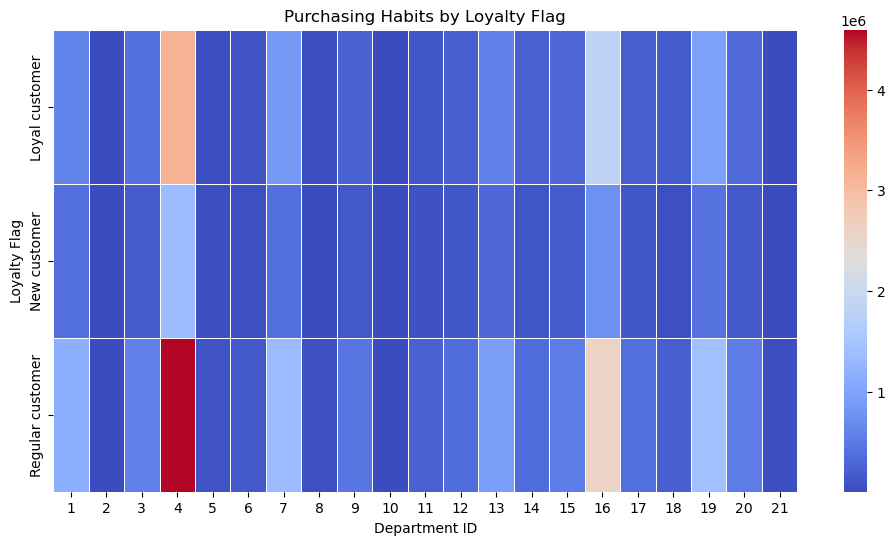

In [53]:
habits = plt.figure(figsize = (12,6))
plt.title('Purchasing Habits by Loyalty Flag')
sns.heatmap(loyal, cmap = 'coolwarm', linewidth=.5)
plt.xlabel('Department ID')
plt.ylabel('Loyalty Flag')

In [54]:
# export habits heatmap
habits.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'habits_heatmap.png'))

In [55]:
# group and transform to make 2d to create horizontal bar chart
region = df_exclusion.groupby(['Region', 'department_id']).size().unstack()

Text(0.5, 36.72222222222221, 'Department ID')

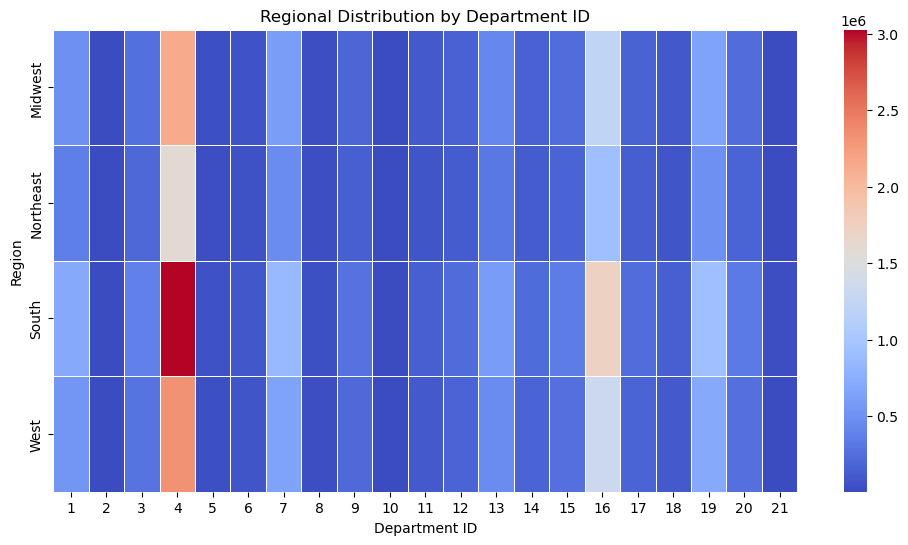

In [56]:
# create heatmap for region
region_heat = plt.figure(figsize = (12,6))
plt.title('Regional Distribution by Department ID')
sns.heatmap(region, cmap = 'coolwarm', linewidth=.5)
plt.xlabel('Department ID')

In [57]:
# export region heatmap
region_heat.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_heat.png'))

In [58]:
# customer profiles and dept comparison

cust_dept = df_exclusion.groupby(['customer_profile','department_id']).size().unstack()

In [59]:
cust_dept

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
customer_profile,,,,,,,,,,,,,,,,,,,,,
Middle-Aged Parent,620619,9915,326867,2644515,41205,74565,758874,27314,240612,9766,127073,197849,522251,196518,296005,1506300,207369,121620,806697,291658,19170
Middle-Aged Single Adult,210059,3432,111962,897801,15073,25381,254834,8713,80709,3116,41374,65283,175909,67097,98844,509507,66753,41112,272873,101132,6184
Senior Citizen Parent,423146,6791,223579,1813012,27554,50686,515378,18349,164020,6851,82961,136819,356648,132810,202766,1029272,141616,80312,548253,199831,12932
Single Senior Citizen,141104,2155,72418,595092,9139,16513,168642,6766,53296,2094,28091,44331,115735,42486,64743,338800,45014,25892,180296,65368,3983
Single Young Adult,178185,3127,97015,782548,12615,22567,221865,8123,70291,2790,36740,56264,152260,56849,87433,446069,59591,36324,237269,86882,5768
Young Adult Parent,548618,8991,288987,2346305,39041,66279,652308,23795,213208,8834,108067,174235,459902,175090,262283,1347234,179514,105132,721018,258963,16731


Text(0.5, 36.72222222222221, 'Department ID')

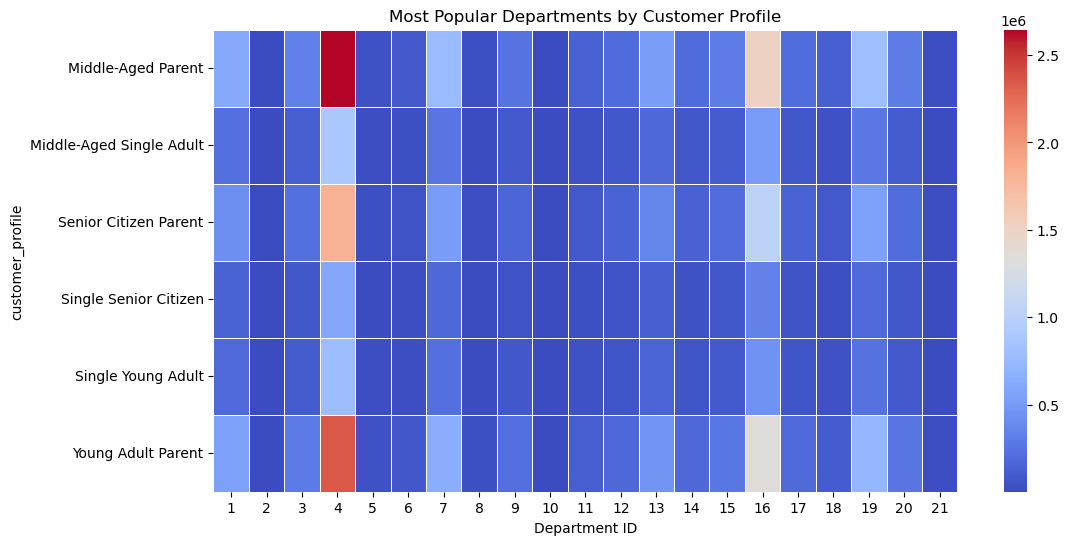

In [60]:
# create heatmap for customer profile and department id
dept_heat = plt.figure(figsize = (12,6))
plt.title('Most Popular Departments by Customer Profile')
sns.heatmap(cust_dept, cmap = 'coolwarm', linewidth=.5)
plt.xlabel('Department ID')

In [61]:
# group income and department id
df_exclusion.groupby('income_bracket')['department_id'].value_counts()

income_bracket  department_id
High Income     4                1134852
                16                659249
                7                 313379
                19                305805
                1                 276434
                                  ...   
Medium Income   5                  75984
                8                  51958
                21                 35708
                2                  18917
                10                 17854
Name: count, Length: 63, dtype: int64

In [62]:
income_dept_id = df_exclusion.groupby(['income_bracket', 'department_id']).size().unstack()

Text(0.5, 36.72222222222221, 'Department ID')

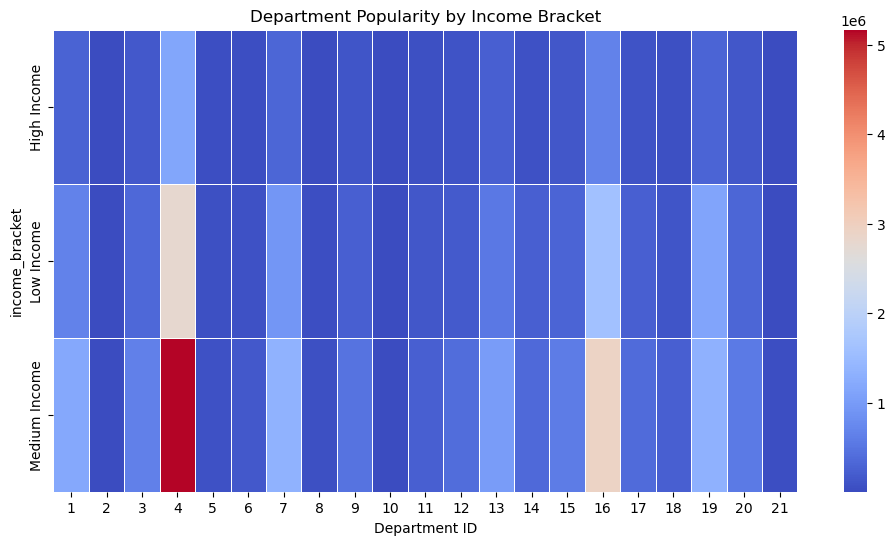

In [63]:
# create heatmap
income_dept = plt.figure(figsize = (12,6))
plt.title('Department Popularity by Income Bracket')
sns.heatmap(income_dept_id, cmap = 'coolwarm', linewidth=.5)
plt.xlabel('Department ID')

In [64]:
df_exclusion['department_id'].value_counts()

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

Text(0, 0.5, 'Count')

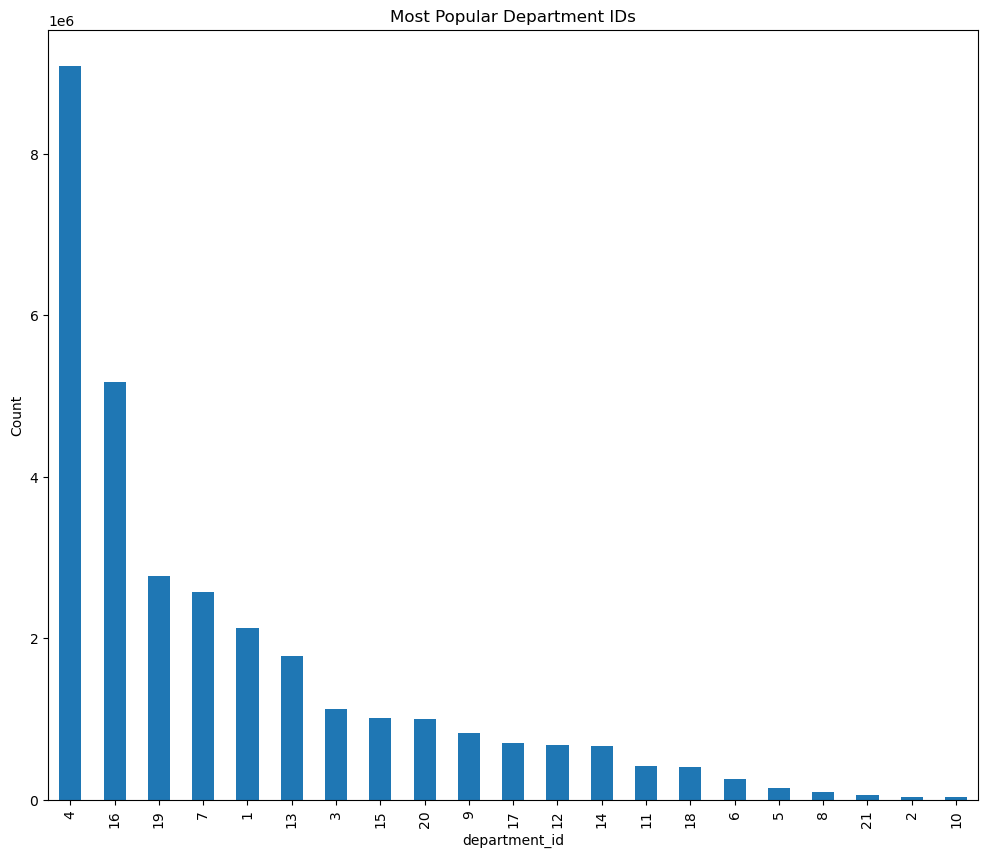

In [65]:
# create department id bar chart
plt.figure(figsize = (12,10))
dept_id_bar = df_exclusion['department_id'].value_counts().plot.bar()
plt.title('Most Popular Department IDs')
plt.ylabel('Count')

In [66]:
# export department id popularity
dept_id_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'dept_bar.png'))